# SUOX: Sulfite Oxidase Deficiency

[Sulfite oxidase deficiency (ISOD)](https://omim.org/entry/272300) is caused by homozygous or compound heterozygous mutation in the sulfite oxidase gene (SUOX).

TODO details

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1.dev0


### SUOX
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SUOX.

In [2]:
gene_symbol = 'NKX6-2'
mane_tx_id = 'NM_001032386.2' 
mane_protein_id = 'NP_001027558.1' # sulfite oxidase, mitochondrial

In [3]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.21") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)

Loaded 33 phenopackets
Individuals Processed: 100%|██████████| 33/33 [00:00<00:00, 532.16individuals/s]


In [6]:
from gpsea.view import CohortViewer

viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Spasticity,HP:0001257,32
Nystagmus,HP:0000639,29
Motor delay,HP:0001270,24
Global developmental delay,HP:0001263,24
Hyperreflexia,HP:0001347,20
Hypotonia,HP:0001252,19
CNS hypomyelination,HP:0003429,18
Loss of ambulation,HP:0002505,13
Ataxia,HP:0001251,9
Abnormal pyramidal sign,HP:0007256,7


Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)
Could not parse feature: Unrecognized protein feature type: "Binding site" (skipping)


ValueError: The transcript annotation for NM_001032386.2 was not found!

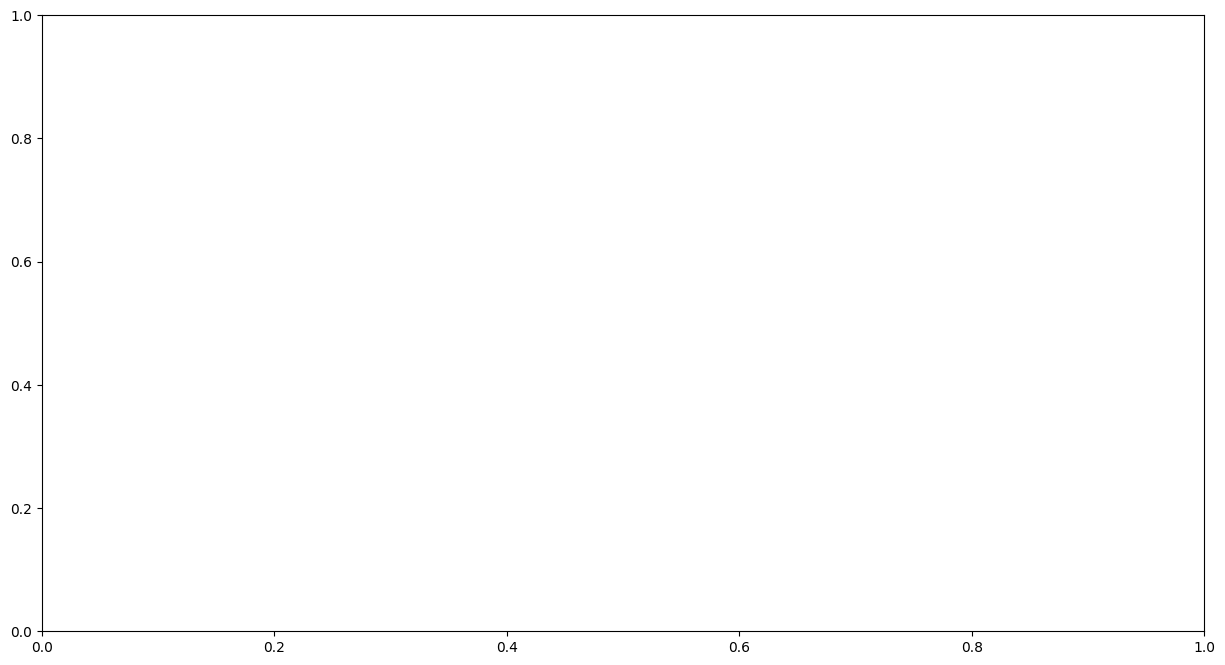

In [8]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)


protein_meta2 = ProteinMetadata.from_uniprot_json(
        protein_id=mane_protein_id,
        label="SUOX",
        uniprot_json="P51687.json",
        protein_length=550,
)


fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

In [9]:
tx_coordinates = txc_service.fetch(mane_tx_id)

In [10]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
html_prot = viewer.process(cohort)
html_prot

Name,Type,Coordinates,Count,Variants
Cytochrome b5 heme-binding,DOMAIN,82 - 161,0,
Hinge,REGION,165 - 174,0,
Moco domain,REGION,175 - 401,0,
Homodimerization,REGION,402 - 538,0,
